<a href="https://colab.research.google.com/github/dileep98490/Machine-learning/blob/Tensorflow-projects/Copy_of_Exercise2_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

The length of data is 60000
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2576 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1153 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0781 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9820
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9729
[4.3817572e-08 1.2218984e-04 9.9986911e-01 8.2119968e-06 1.1960192e-13
 1.1500372e-07 7.9746005e-09 4.2674425e-14 4.0096933e-07 1.2821820e-10]
2


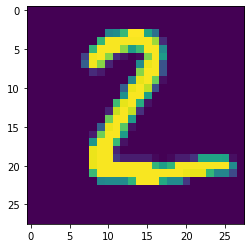

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print('The length of data is',len(x_train))
x_train=x_train/255.0
x_test=x_test/255.0

# YOUR CODE SHOULD START HERE

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])
model.evaluate(x_test,y_test)
cf = model.predict(x_test)
print(cf[1])
print(y_test[1])
plt.imshow(x_test[1])
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE